# **Abdulrahman Alhajj**

---

🟠 **Connect with me:**

[![GitHub](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&style=social&logo=github&logoColor=white)](https://github.com/aaaalhajoo1)
[![Follow](https://img.shields.io/twitter/follow/aaaalhaj000?style=social)](https://www.twitter.com/aaaalhaj000)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&style=social&logo=linkedin&logoColor=white)](https://linkedin.com/in/abdulrahman-alhajj)
[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&style=social&logo=Kaggle&logoColor=white)](https://www.kaggle.com/abdulrahmanahajj)

---

##Project Explanation
###Introduction
In every data analysis project, we need a solid foundation to succeed. Such a foundation consists of specific steps that we need to perform necessary actions, gather the required information, and finally perform a well-structured and holistic data analysis.

###Problem Identification/ Problem Statement
In the first step, we should understand what exactly the problem is, which logic exists behind the problem, how it affects all the involved parties, and what clarified points of the main objective in the current data science project.

The main idea of this project is to extract actionable insights from the given data of a company that improves its decision-making process. Furthermore, we want to provide the best possible predictive model for the marketing campaign of their new product which shows if a customer buys the new product or not and how much is the possibility of the purchase.

###Data Description
The provided data is split into two CSV files containing the training (train.csv), and the test data (test.csv). The training date set includes 31480 records, containing customer and operational features. Customer features cover master data of customers such as their age, gender, occupation, marital status, education level, and account balance, while operational features are related to the last campaign activities including the last campaign result, contact date, contact duration, etc. The test date set consists of 13732 samples containing all the provided features in training data except the target value. In general, we have 19 features and one target variable that should be predicted. These features can be described as follows:

| Feature | Type | Description |
|---|---|---|
| id | Numerical | record ID |
| target | Object | target value (customer response to the marketing campaign) |
| day | Numerical | contact day in previous campaign |
| month | Object | contact month in previous campaign |
| duration | Numerical | contact duration in previous campaign |
| contactId | Numerical | contact ID |
| age | Numerical | age of the customer |
| gender | Object | customer gender |
| job | Object | customer occupation |
| maritalStatus | Object | customer marital status |
| education | Object | customer educational degree |
| craditFailure | Object | if the customer has a default credit |
| accountBalance | Numerical | customer account balance |
| house | Object | if the customer owns a house |
| credit | Object | if the customer has a credit |
| contactType | Object | contact media |
| numberOfContacts | Numerical | number of contacts during the current campaign |
| daySinceLastCampaign | Numerical | days after the last contact of the previous campaign |
| numberOfContactsLastCampaign | Numerical | number of contacts during the previous campaign |
| lastCampaignResult | Object | result of the previous campaign |

# **Load Necessary Libraries**

In [ ]:
#Libraries for Data cleaning and Data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for Data preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#Machine learning
from sklearn.ensemble import RandomForestClassifier

#Libraries for machine learning Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# **EDA (Exploratory data analysis)**


## **Exploratory our Data**

In [ ]:
#Load data
df=pd.read_csv("train.csv")
df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


In [ ]:
#Show information in the dataset( name columns and not null and Dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [ ]:
#Show all null  values
df.isnull().sum()

id                                  0
target                              0
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                                 0
maritalStatus                       0
education                           0
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                         0
numberOfContacts                    0
daySinceLastCampaign            25742
numberOfContactsLastCampaign        0
lastCampaignResult                  0
dtype: int64

In [ ]:
#Replace unknown with null values
df.replace("unknown",pd.np.nan,inplace=True)

<ipython-input-119-5f130e9a2ff7>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace("unknown",pd.np.nan,inplace=True)


In [ ]:
#Show null values after unknown replacement with null values
df.isnull().sum()

id                                  0
target                              0
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                               212
maritalStatus                       0
education                        1300
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                      9079
numberOfContacts                    0
daySinceLastCampaign            25742
numberOfContactsLastCampaign        0
lastCampaignResult              25746
dtype: int64

In [ ]:
#Show name cloumns
df.columns

Index(['id', 'target', 'day', 'month', 'duration', 'contactId', 'age',
       'gender', 'job', 'maritalStatus', 'education', 'creditFailure',
       'accountBalance', 'house', 'credit', 'contactType', 'numberOfContacts',
       'daySinceLastCampaign', 'numberOfContactsLastCampaign',
       'lastCampaignResult'],
      dtype='object')

In [ ]:
#Dataset shape
df.shape

(31480, 20)

### **Replace month names with month numbers**
Converting months from names to dates, such as January to 01, and so on ......


In [ ]:

month_map = {
      "jan": "01",
      "feb": "02",
      "mar": "03",
      "apr": "04",
      "may": "05",
      "jun": "06",
      "jul": "07",
      "aug": "08",
      "sep": "09",
      "oct": "10",
      "nov": "11",
      "dec": "12"}

# Replace month names in the dfFrame with month numbers
df["month"]=df["month"].replace(month_map)
df


,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,05,166,623,30,female,worker,married,highSchool,no,-202,no,no,NaN,2,NaN,0,NaN
1,432184318,no,26,10,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,NaN
2,432182482,no,5,06,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,NaN
3,432150520,no,2,06,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,NaN,3,NaN,0,NaN
4,432145870,no,15,05,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,NaN,2,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31475,432184725,yes,30,11,1628,69542367,58,female,technical,married,highSchool,no,3399,no,no,landline,2,188.0,8,success
31476,432147139,no,21,05,173,69542565,40,female,manager,single,secondarySchool,no,858,yes,no,NaN,1,NaN,0,NaN
31477,432166958,no,17,11,422,69543453,51,female,worker,married,highSchool,no,1414,yes,no,NaN,3,186.0,2,failure
31478,432166312,no,29,08,69,69544121,30,male,technical,married,uniGraduated,no,1,no,no,cellPhone,21,NaN,0,NaN


### **Calculate describe statistics (count , max , min , 50%,25% ,75% , mean)**

Creates a new variable called df_describe and Remove contactId, id because is not important

The second line of code, df_describe.describe(), prints the summary statistics of the df_describe DataFrame. The describe() method calculates the mean, standard deviation, minimum, maximum, and quartiles of the DataFrame.

In [ ]:
df_describe=df.copy()
df_describe=df.drop(["contactId","id"], axis=1)
df_describe.describe()

,day,duration,age,accountBalance,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign
count,31480.000000,31480.000000,31480.000000,31480.000000,31480.000000,5738.000000,31480.000000
mean,15.799015,258.498380,40.935737,1348.535133,2.779670,225.272395,0.584339
std,8.323251,256.576891,10.629198,2974.355578,3.139269,116.488328,2.469742
min,1.000000,0.000000,18.000000,-8019.000000,1.000000,1.000000,0.000000
25%,8.000000,104.000000,33.000000,70.000000,1.000000,133.000000,0.000000
50%,16.000000,180.000000,39.000000,442.000000,2.000000,195.000000,0.000000
75%,21.000000,320.000000,48.000000,1410.000000,3.000000,327.000000,0.000000
max,31.000000,4918.000000,95.000000,98417.000000,63.000000,871.000000,275.000000


## **Questions**

These questions can be asked in exploratory data analysis and you can ask
more questions

###**What is the  difference between the number of males and females compared to the acceptance or rejection of the marketing campaign?**


<Axes: title={'center': 'Count Gender by Target'}, xlabel='gender', ylabel='count'>

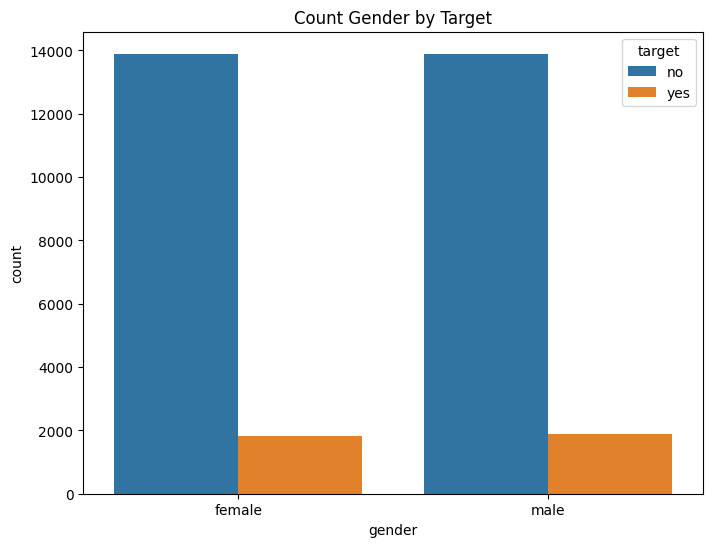

In [ ]:
# size figure
data=df.copy()
fig, ax=plt.subplots(figsize=(8,6))
ax.set_title("Count Gender by Target")
# Countplot
sns.countplot(x='gender',data=data,hue="target",ax=ax)

We note that the number of males and females is almost equal, but the number of those who reject the marketing campaign is very large in proportion to those who agree with the marketing campaign.

### **What is the relationship between age and contract duration ?**


<Axes: title={'center': 'Relationship between age and duration'}, xlabel='age', ylabel='duration'>

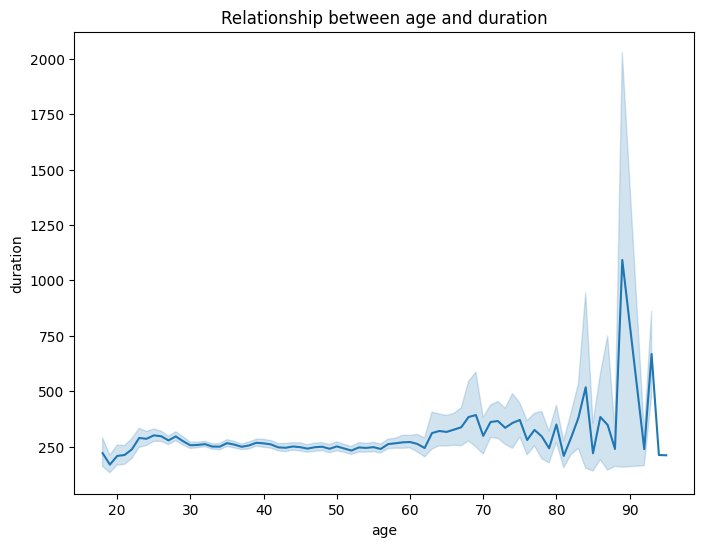

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
data=df.copy()
ax.set_title("Relationship between age and duration")
sns.lineplot(x='age',y='duration',data=data,ax=ax)

We notice that the duration of the conversation increases from the age of 80 to 90 compared to younger people.

###**Boxplot that shows the distribution of the age variable for each target value**


<Axes: title={'center': 'Distribution of the age by target'}, xlabel='age', ylabel='target'>

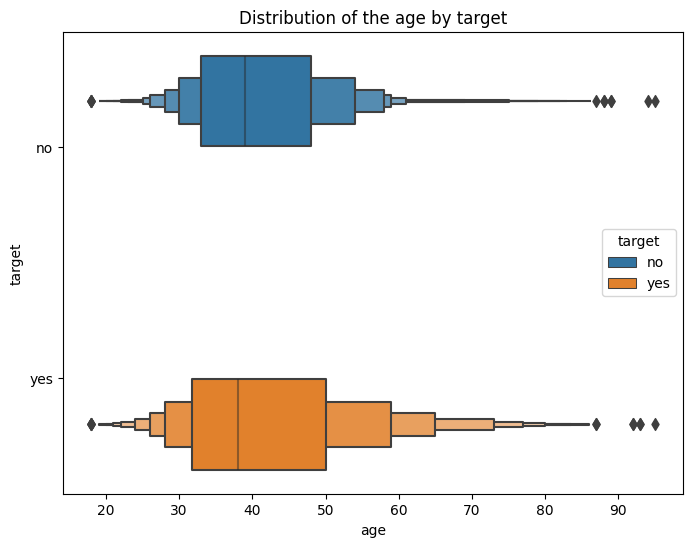

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
data=df.copy()
ax.set_title("Distribution of the age by target")
sns.boxenplot(x="age",y="target",hue="target",data=data,ax=ax)

We note the boxplot that shows the distribution of the age variable for each target value shows the minimum, 25th percentile, median, 75th percentile, and maximum values for the age variable for each target value. The boxes will be colored differently for each target value.

### **What are the Types of Educations ?**


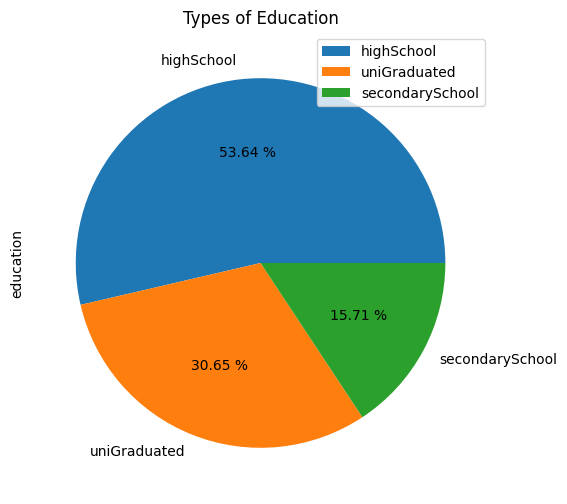

In [ ]:
# Create a df frame of education counts
df.copy()
education_counts = df['education'].value_counts()

# Plot a pie chart
education_counts.plot(kind='pie', title='Types of Education',autopct='%.2f %%', figsize=(8,6))

plt.legend()
plt.show()

We note the types of education in the dataset: high school: 53.64%, ungraduated: 30.65%, and secondary school : 15.71%

### **What are the Distribution Ages?**


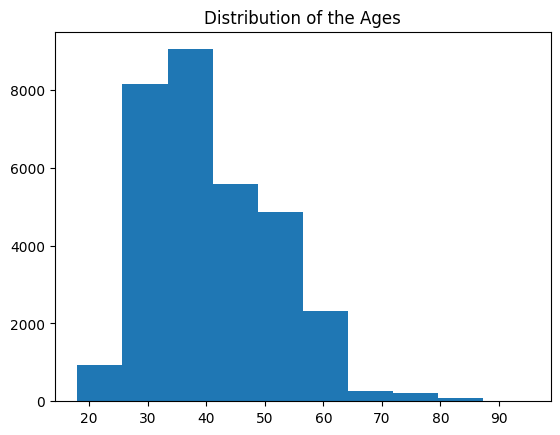

In [ ]:
df.copy()
plt.hist(df.age)
plt.title("Distribution of the Ages")
plt.show()

We note that the largest group of customers in normal distribution is from the ages of 25 to 55

### **What are the Types of jobs?**


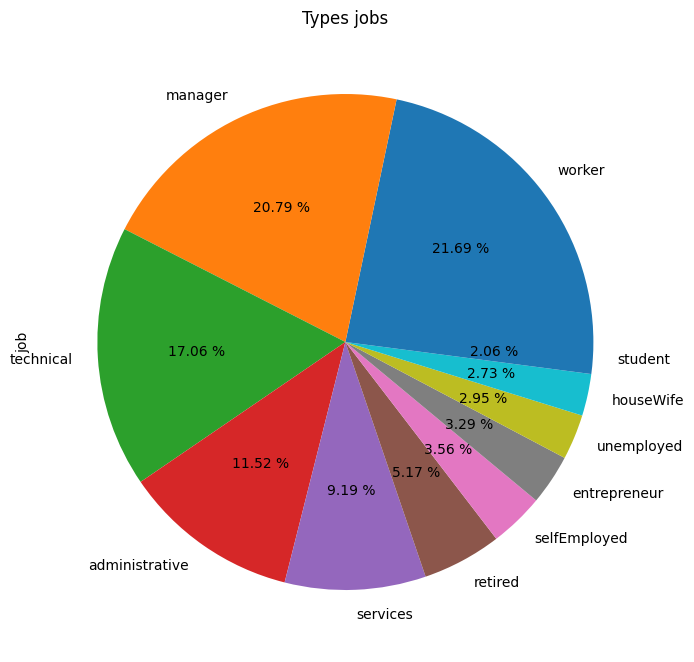

In [ ]:
#type of job
df.copy()
job_counts = df['job'].value_counts()
job_counts.plot(kind='pie', title='Types jobs',autopct='%.2f %%', figsize=(8,10))
plt.show()

We note that the types of jobs : Worker: 21.69%, Manager: 20.79%, and Technician: 17.06% highest compared to other jobs.

###**What is the relationship between marital status and account balance ?**





<Axes: title={'center': 'Marital Status vs Account Balance'}, xlabel='maritalStatus', ylabel='accountBalance'>

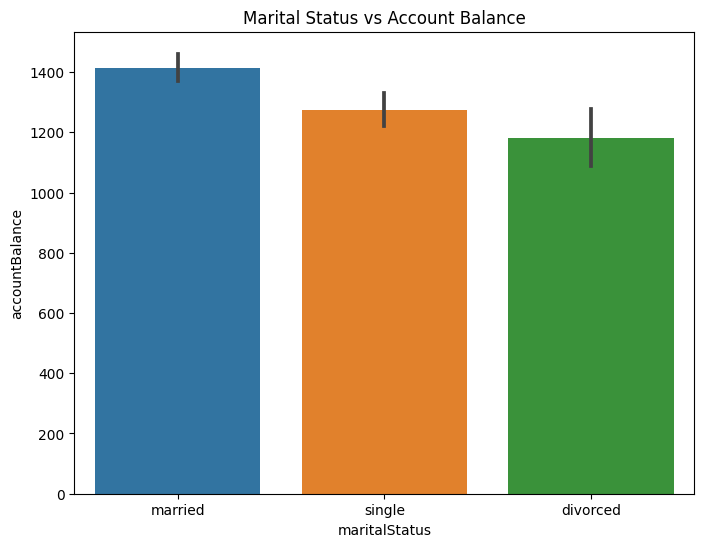

In [ ]:
data=df.copy()
fig, ax=plt.subplots(figsize=(8,6))
ax.set_title("Marital Status vs Account Balance")
sns.barplot(x="maritalStatus",y="accountBalance",data=data,ax=ax)

We note that the account balances of married people are higher than those of single people, and that single people have higher  than those who are divorced

###**Who is the person who has the highest account balance?**

In [ ]:
ga=df[(df.gender==df.gender)&(df.accountBalance==df.accountBalance.max())]
ga

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
25480,432168574,no,20,11,145,56135495,59,female,manager,married,uniGraduated,no,98417,no,no,landline,5,NaN,0,NaN


### **How many customers have jobs but have no credits responded to the marketing campaign?**



In [ ]:
job=df[(df.job==df.job)&(df.credit=="no")]
print("Number of Customers :",job.count().sum())

Number of Customers : 473966


### **How many customers have jobs and credits responded to the marketing campaign?**

In [ ]:
job=df[(df.job==df.job)&(df.credit=="yes")]
print("Number of Customers :",job.count().sum())

Number of Customers : 90058


### **What best types of contact ?**

<Axes: title={'center': 'What best types of contact '}, xlabel='contactType', ylabel='count'>

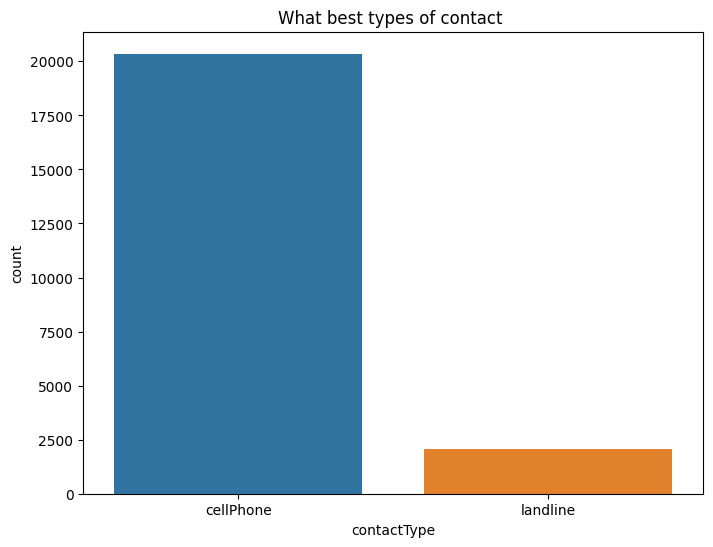

In [ ]:
data=df.copy()
fig, ax=plt.subplots(figsize=(8,6)) # size figure
ax.set_title("What best types of contact ")
sns.countplot(x='contactType',data=data)

We note that the cell phone connection is much higher than the landline phone connection

# **Prediction model**

## **Feature Enginering**

### **Calculate the percentage of nulls values**

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),'% missing values')

job 0.0067 % missing values
education 0.0413 % missing values
contactType 0.2884 % missing values
daySinceLastCampaign 0.8177 % missing values
lastCampaignResult 0.8179 % missing values


We note that the percentage of null data is daySinceLastCampaign 0.8175% missing values lastCampaignResult 0.8176% missing values We drop these columns due to the high percentage of null values and Remove contactId, id because is not important

### **Select all data except daySinceLast Campaign, lastCampaignResult, Id, and contactId**

In [ ]:
df.copy()
data=data.drop(["daySinceLastCampaign","lastCampaignResult","id","contactId"], axis=1)

Now we replace yes to 1 and no to 0 in target

In [ ]:
target_new = {"target": {"yes": 1, "no": 0}}
data.replace(target_new, inplace=True)

### **Change Categorical Feature to Numerical Feature and merge columns**





In [ ]:
#select all Categorical Features
cat=data.select_dtypes(include=["object"])
#import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
Cat=enc.fit_transform(cat)
cat=pd.DataFrame(Cat,columns=cat.columns)
#select all Numerical Features
num=data.select_dtypes(exclude=["object"])
#marge Categorical Feature and Numerical Feature
data1=pd.concat([num,cat], axis="columns")
#replace null values to mean values
data1.fillna(data1.mean(),inplace=True)
data1

,target,day,duration,age,accountBalance,numberOfContacts,numberOfContactsLastCampaign,month,gender,job,maritalStatus,education,creditFailure,house,credit,contactType
0,0,27,166,30,-202,2,0,4.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.091424
1,0,26,183,42,2463,2,0,9.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.000000
2,0,5,227,26,2158,1,0,5.0,0.0,6.0,2.0,0.0,0.0,1.0,1.0,1.000000
3,0,2,31,34,75,3,0,5.0,1.0,9.0,0.0,2.0,1.0,1.0,0.0,0.091424
4,0,15,1231,48,559,2,0,4.0,1.0,10.0,1.0,1.0,0.0,1.0,0.0,0.091424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31475,1,30,1628,58,3399,2,8,10.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,1.000000
31476,0,21,173,40,858,1,0,4.0,0.0,3.0,2.0,1.0,0.0,1.0,0.0,0.091424
31477,0,17,422,51,1414,3,2,10.0,0.0,10.0,1.0,0.0,0.0,1.0,0.0,0.091424
31478,0,29,69,30,1,21,0,7.0,1.0,8.0,1.0,2.0,0.0,0.0,0.0,0.000000


### **Imbalanced data**

Imbalanced data In simple terms, an unbalanced dataset is one in which the target variable has more observations in one specific class than the others.

now create a pie chart to select whether data is balanced or not

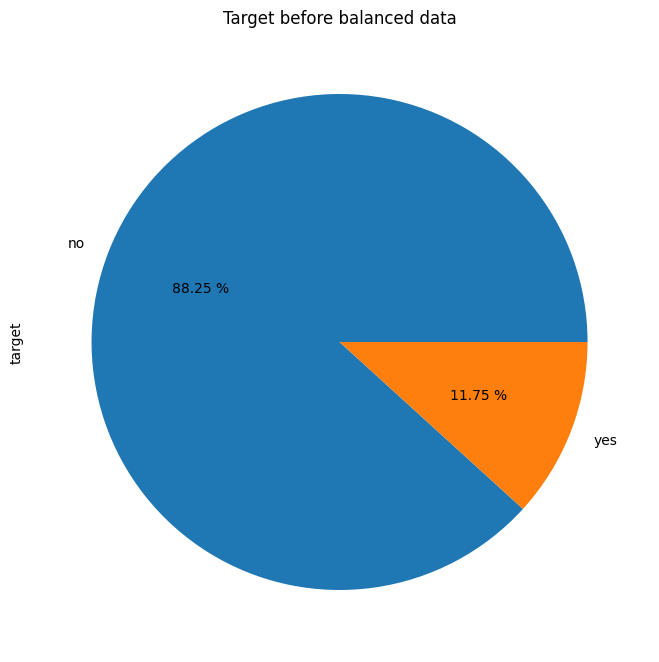

In [ ]:
job_counts = df['target'].value_counts()
job_counts.plot(kind='pie', title='Target before balanced data',autopct='%.2f %%', figsize=(8,10))
plt.show()

Data is Imbalanced We use a technique called Random Over Sampling (ROS) is a technique used to address the problem of imbalanced datasets in machine learning. Imbalanced datasets occur when one class (the majority class) has significantly more samples than another class (the minority class). This can lead to machine learning models that are biased towards the majority class and perform poorly on the minority class.

ROS works by randomly duplicating samples from the minority class, with replacements, until the desired class balance is achieved. This means that some samples from the minority class may be duplicated multiple times, while others may not be duplicated at all.

First, we will divide the data into two categories: features and target, create X and y, and transform it into an array for ease of dealing with machine learning,x is all values except target and y  is a target

In [ ]:
X=np.array(data1.drop(['target'], axis=1))
y=np.array(data1["target"])

After knowing the data is imbalanced we use the imbalanced technique Random Over Sampling
using imblearn library and split data to trian 80% and test 20%

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1) # Numerical value
X_res, y_res = ros.fit_resample(X,y)
#split data to train and test
# recall from sklearn.model_selection import train_test_split in sklearn
# split data to trian 80% and test 20% random_state=42
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=42)

Now we check whether the data is balanced or not

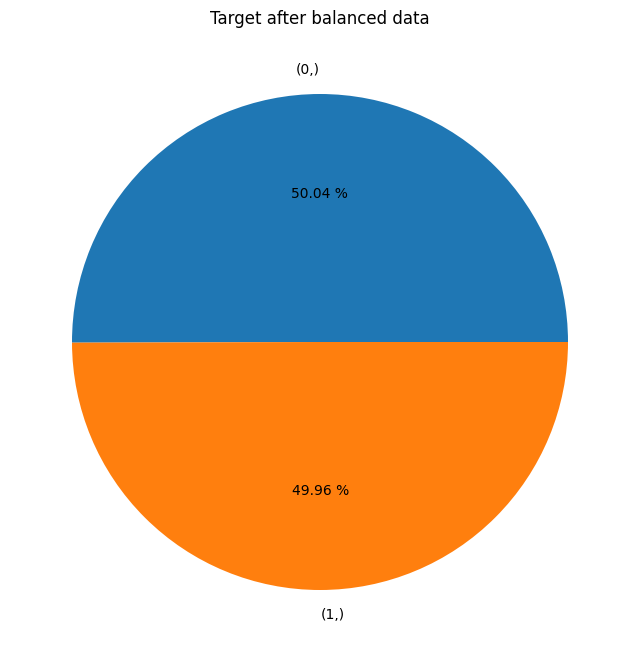

In [ ]:
t=pd.DataFrame(y_train)
job_counts = t.value_counts()
job_counts.plot(kind='pie', title='Target after balanced data',autopct='%.2f %%', figsize=(8,10))
plt.show()

Great, the data is balanced, the number of target data is almost equal

### **Feature Scaling**

Now we will use the scaling feature to make the data the same size to improve the result of the prediction model

In [ ]:
from sklearn.preprocessing import scale
X_train=scale(x_train)
X_test=scale(x_test)

## **Build model use Random Forest Classifier**

I tested 7 machine learning models and the result was that the highest value was for  RandomForestClassifier:

| Model | Result
|---|---|
|LogisticRegression|0.7762%|
|RandomForestClassifier| 0.9700%|
|SVC |0.8833%|
|KNeighborsClassifier|0.9095%|
|BaggingClassifier|0.9454%|
|GradientBoostingClassifier|0.8838%|
|AdaBoostClassifier|0.8656%|


Now we create a Prediction model using the Random Forest Classifier machine learning algorithm, First, what is a Random Forest algorithm A random forest is a supervised machine learning algorithm that can be used for classification and regression tasks. It is a type of ensemble learning method, which means that it combines the predictions of multiple individual models to produce a final prediction.

Random forest classifiers work by constructing a multitude of decision trees during training. Each decision tree is trained on a different random subset of the training data, and a random subset of features is considered at each split. This helps to reduce overfitting and improve the generalization performance of the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
#predict x_test values
pred=rfc.predict(X_test)
#print accuracy for algorithm
print("Accuracy for Random Forest Classifier data: ",rfc.score(X_test,y_test))

Accuracy for Random Forest Classifier data:  0.9700323974082073


### **Model Evaluation Metrics**

 Check the quality of the model using the Loss L2 Function , Classification Report, Confusion Matrix, ROC Curve, and AUC

 **Loss L2 Function**

L1 loss, also known as absolute error loss or mean absolute error (MAE), is a loss function that measures the average absolute difference between the predicted values and the true values. It is calculated as follows:

L1 loss = (1/n) * sum(|pred - y_test|)



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def l2_loss(y_test, pred):
  """Computes the L2 loss between y_test and y_pred."""
  return np.mean((y_test - pred)**2)

clf = RandomForestClassifier(criterion='mse')

print("loss L2 Function:",l2_loss(y_test, pred))

loss L2 Function: 0.029967602591792656


**Classification Report**

A classification report is a performance evaluation metric in machine learning that is used to assess the performance of a classification model. It provides a summary of various metrics that describe the model's performance, such as precision, recall, F1-score, and support.

Precision is the proportion of positive predictions that are actually correct. It is calculated as follows:
Precision = TP / (TP + FP)
where:

*   TP is the number of true positives
*   FP is the number of false positives

Recall is the proportion of actual positive cases that are correctly identified. It is calculated as follows:

Recall = TP / (TP + FN)
where:

*  FN is the number of false negatives

F1-score is a harmonic mean of precision and recall. It is calculated as follows:

F1-score = 2 * (Precision * Recall) / (Precision + Recall)


Support is the total number of samples in a class.


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5537
           1       0.94      1.00      0.97      5575

    accuracy                           0.97     11112
   macro avg       0.97      0.97      0.97     11112
weighted avg       0.97      0.97      0.97     11112



**Confusion Matrix**

A confusion matrix is a table that summarizes the performance of a machine-learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The confusion matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data

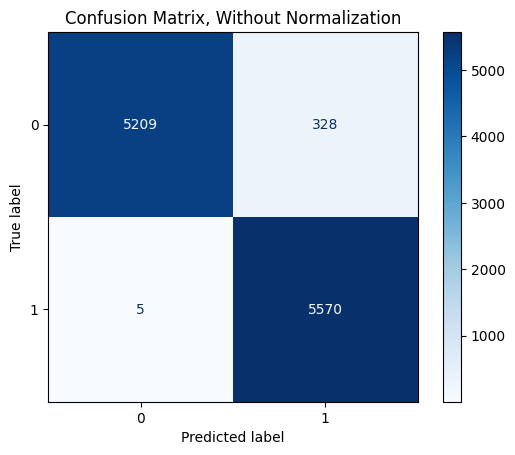

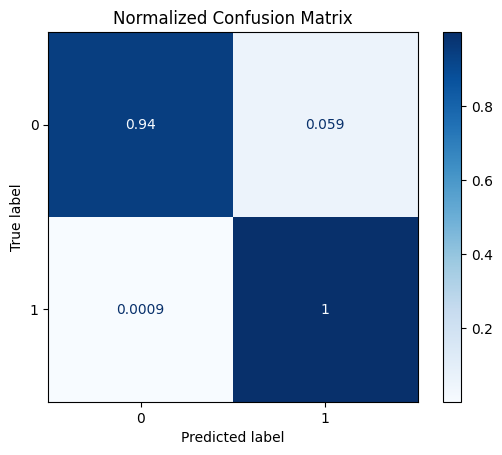

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

titles_options = [
    ("Confusion Matrix, Without Normalization", None),
    ("Normalized Confusion Matrix", "true"),
]

# Create a ConfusionMatrixDisplay object
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rfc,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,

    )
    disp.ax_.set_title(title)



# Show the plot
plt.show()

**ROC Curve and AUC**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

*   True Positive Rate

*   False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).



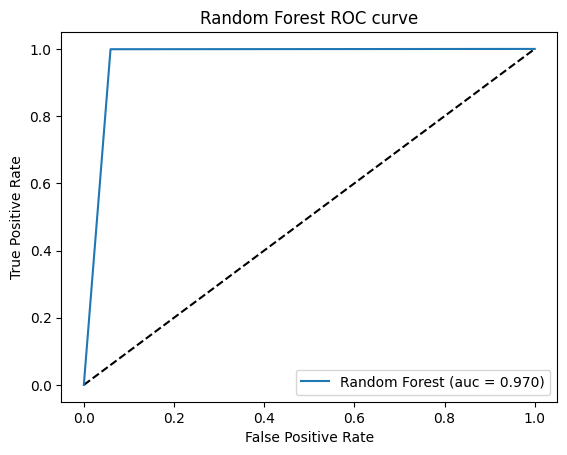

In [ ]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_rfc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest (auc = %0.3f)'% auc_rfc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()


##**Test the model in test.csv file**

Now repeat the steps from training data file to test the data file

In [ ]:
#load test data file
dft=pd.read_csv("test.csv")

In [ ]:
dft.copy()
month_map = {
      "jan": "01",
      "feb": "02",
      "mar": "03",
      "apr": "04",
      "may": "05",
      "jun": "06",
      "jul": "07",
      "aug": "08",
      "sep": "09",
      "oct": "10",
      "nov": "11",
      "dec": "12"}

# Replace month names in the dfFrame with month numbers
dft["month"]=dft["month"].replace(month_map)

In [ ]:
datat=dft.copy()
datat=datat.drop(["daySinceLastCampaign","lastCampaignResult","target","id","contactId"], axis=1)

In [ ]:
datat=datat.copy()
catt=datat.select_dtypes(include=["object"])
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
Catt=enc.fit_transform(catt)
catt=pd.DataFrame(Catt,columns=catt.columns)
num=datat.select_dtypes(exclude=["object"])
datat=pd.concat([num,catt], axis="columns")
datat.fillna(datat.mean(),inplace=True)

In [ ]:
# Taking the probabilities of the test data
test_rfc = rfc.predict_proba(datat)
test_predict = test_rfc[:,1]
# Stammnummer of the test samples
ids_ = dft['id'].values

# creating a dataframe, saving the information inside it and save it into a csv file
test_Expected = pd.DataFrame(columns=['ID', 'Expected'])
test_Expected['ID'] = ids_
test_Expected['Expected'] =test_predict


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#save data in csv file without index
#Expected=test_Expected.to_csv("results.csv",index=False)
